To accentuate the white matter and gray matter in the brain proton density image, we need to apply two intensity transformations:

White Matter: Typically has a higher intensity range in MRI images.
Gray Matter: Typically has a mid-range intensity.

steps needed:

Step 1: Load the brain image.
Step 2: Apply an intensity transformation to highlight white matter and gray matter.
Step 3: Show intensity transformation plots.

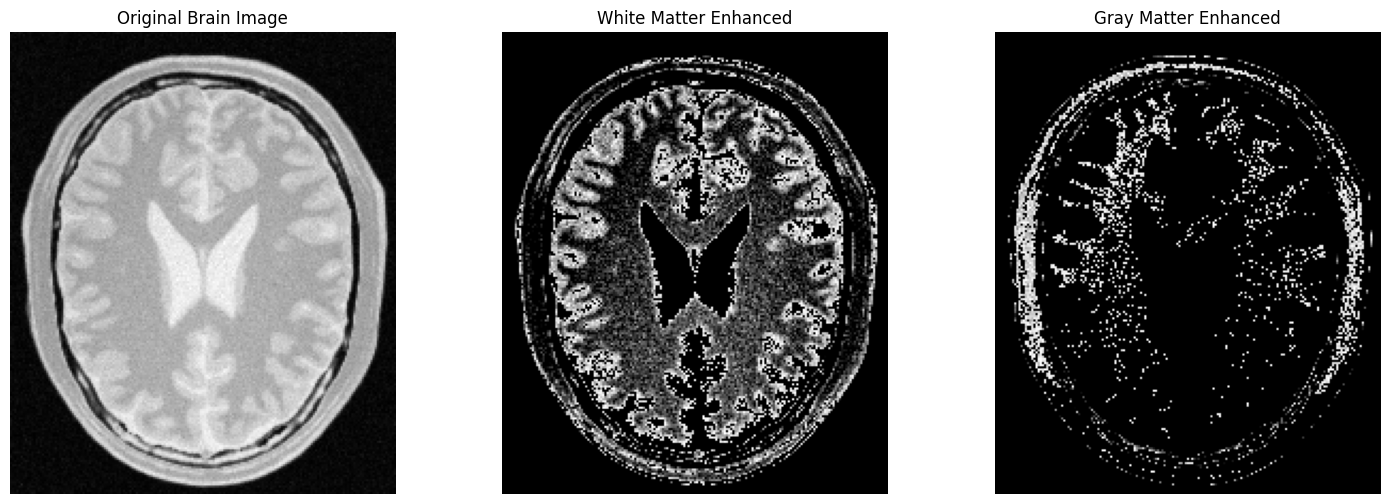

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the brain image
brain_image_path = 'utils/brain_proton_density_slice.png'  # Update with the correct path
brain_image = Image.open(brain_image_path).convert('L')  # Convert to grayscale

# Convert the brain image to a numpy array
brain_image_np = np.array(brain_image)

# Define the intensity transformation for accentuating white matter
def white_matter_transformation(pixel_value):
    if 160 <= pixel_value <= 200:
        return min(255, int(255 * (pixel_value - 160) / 40))  # Stretch values to the highest contrast
    else:
        return 0  # Suppress other intensities

# Define the intensity transformation for accentuating gray matter
def gray_matter_transformation(pixel_value):
    if 110 <= pixel_value <= 160:
        return min(255, int(255 * (pixel_value - 110) / 50))  # Stretch values to enhance contrast
    else:
        return 0  # Suppress other intensities

# Vectorize both transformation functions
vectorized_white_matter = np.vectorize(white_matter_transformation)
vectorized_gray_matter = np.vectorize(gray_matter_transformation)

# Apply transformations
white_matter_image_np = vectorized_white_matter(brain_image_np).astype(np.uint8)
gray_matter_image_np = vectorized_gray_matter(brain_image_np).astype(np.uint8)

# Convert the numpy arrays back to images
white_matter_image = Image.fromarray(white_matter_image_np)
gray_matter_image = Image.fromarray(gray_matter_image_np)

# Plot the original and transformed images
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original brain image
axes[0].imshow(brain_image_np, cmap='gray')
axes[0].set_title("Original Brain Image")
axes[0].axis('off')

# White matter enhanced
axes[1].imshow(white_matter_image_np, cmap='gray')
axes[1].set_title("White Matter Enhanced")
axes[1].axis('off')

# Gray matter enhanced
axes[2].imshow(gray_matter_image_np, cmap='gray')
axes[2].set_title("Gray Matter Enhanced")
axes[2].axis('off')

plt.show()

Intensity Transformation Plots:

The input intensity values (from 0 to 255) are mapped to output values using the transformation functions for white and gray matter.
These mappings are then plotted to visualize how the intensities are transformed.
Steps:

The code will display:
The original brain image and the enhanced images for white and gray matter.
The transformation plots showing how intensities are adjusted to accentuate white and gray matter.

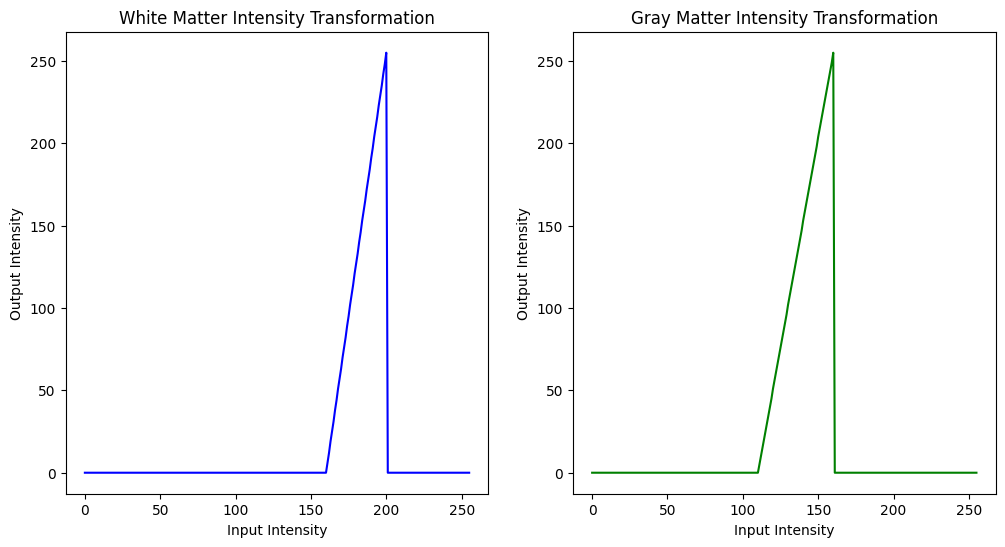

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Defining approximate intensity ranges for white and gray matter
# White matter is generally in the 160-200 range
# Gray matter is generally in the 110-160 range

# Define the intensity transformation for accentuating white matter
def white_matter_transformation(pixel_value):
    if 160 <= pixel_value <= 200:
        return min(255, int(255 * (pixel_value - 160) / 40))  # Stretch values to the highest contrast
    else:
        return 0  # Suppress other intensities

# Define the intensity transformation for accentuating gray matter
def gray_matter_transformation(pixel_value):
    if 110 <= pixel_value <= 160:
        return min(255, int(255 * (pixel_value - 110) / 50))  # Stretch values to enhance contrast
    else:
        return 0  # Suppress other intensities

# Now, let's create the intensity transformation plots for white and gray matter
intensity_values = np.arange(0, 256)

# Apply the transformations to intensity values for plotting
white_matter_transformed = np.array([white_matter_transformation(i) for i in intensity_values])
gray_matter_transformed = np.array([gray_matter_transformation(i) for i in intensity_values])

# Plot the intensity transformation functions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# White matter transformation plot
axes[0].plot(intensity_values, white_matter_transformed, color='blue')
axes[0].set_title("White Matter Intensity Transformation")
axes[0].set_xlabel("Input Intensity")
axes[0].set_ylabel("Output Intensity")

# Gray matter transformation plot
axes[1].plot(intensity_values, gray_matter_transformed, color='green')
axes[1].set_title("Gray Matter Intensity Transformation")
axes[1].set_xlabel("Input Intensity")
axes[1].set_ylabel("Output Intensity")

plt.show()

## Approach 2

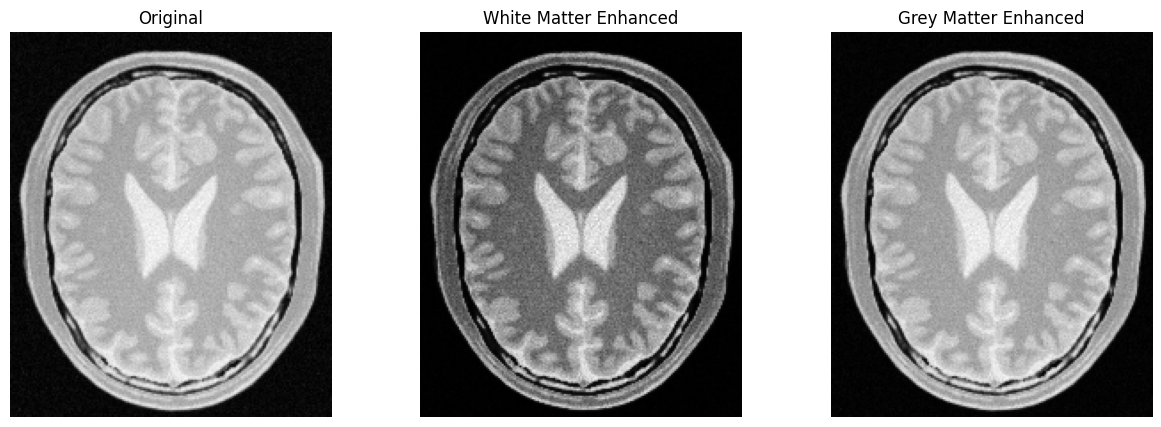

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain image
brain_image_path = 'utils/brain_proton_density_slice.png'  # Update with the correct path
brain_image = cv.imread(brain_image_path, cv.IMREAD_GRAYSCALE)  # opening in grayscale

# Define the intensity transformation for accentuating white matter
discontinuities_white = np.array([(125, 25), (255,255)])

white_t1 = np.linspace(0, discontinuities_white[0,1], discontinuities_white[0,0] + 1 - 0).astype('uint8')
white_t2 = np.linspace(discontinuities_white[0,1], discontinuities_white[1,1], discontinuities_white[1,0] - discontinuities_white[0,0] + 1).astype('uint8')

white_transform = np.concatenate([white_t1, white_t2[1:]])  # Skip the first value to avoid overlap

whitematter_enhanced = cv.LUT(brain_image, white_transform)

gray_discontinuities = np.array([(50, 25), (255,255)])

gray_t1 = np.linspace(0, gray_discontinuities[0,1], gray_discontinuities[0,0] + 1 - 0).astype('uint8')
gray_t2 = np.linspace(gray_discontinuities[0,1], gray_discontinuities[1,1], gray_discontinuities[1,0] - gray_discontinuities[0,0] + 1).astype('uint8')

grey_transform = np.concatenate([gray_t1, gray_t2[1:]])

grey_matter_enhanced = cv.LUT(brain_image, grey_transform)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(brain_image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis(False)
axes[1].imshow(whitematter_enhanced, cmap='gray')
axes[1].set_title('White Matter Enhanced')
axes[1].axis(False)
axes[2].imshow(grey_matter_enhanced, cmap='gray')
axes[2].set_title('Grey Matter Enhanced')
axes[2].axis(False)
plt.show()

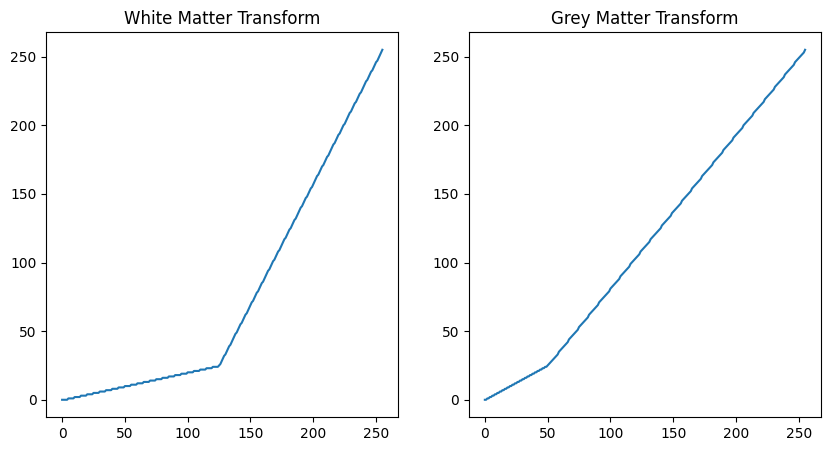

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(white_transform)
axes[0].set_title('White Matter Transform')
axes[1].plot(grey_transform)
axes[1].set_title('Grey Matter Transform')
plt.show()